## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID" )
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stddev = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Std Dev": stddev,
    "SEM": sem})
summary

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

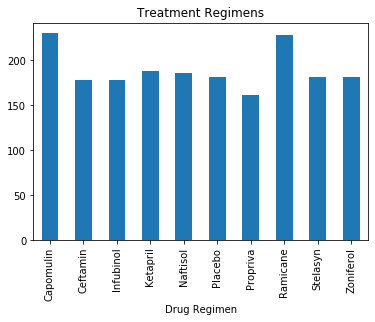

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
reg_data = df.groupby("Drug Regimen")["Mouse ID"].count()
reg_data.reset_index()
reg_data.plot(kind="bar", title="Treatment Regimens")

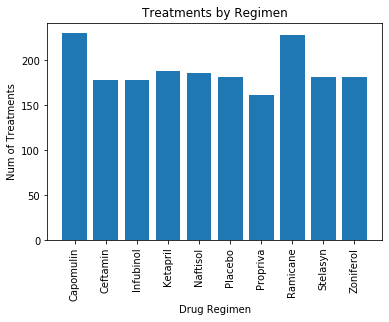

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(reg_data.index, reg_data, align="center")
tick_locations = [reg for reg in df["Drug Regimen"].unique()]
plt.xticks(tick_locations, df["Drug Regimen"].unique(), rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Num of Treatments")
plt.title("Treatments by Regimen")
plt.show()

## Pie plots

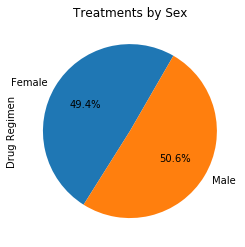

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = df.groupby("Sex")["Drug Regimen"].count()
sex_data.reset_index()
sex_data.plot(kind="pie", title="Treatments by Sex", autopct="%1.1f%%", startangle=60)

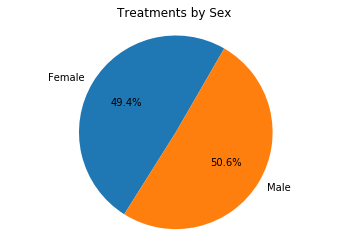

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_data, labels=sex_data.index, autopct="%1.1f%%", startangle=60)
plt.axis("equal")
plt.title("Treatments by Sex")
plt.show()

## Quartiles, outliers and boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_vol = df.loc[df['Drug Regimen']=='Capomulin',"Tumor Volume (mm3)"]
ramicane_vol = df.loc[df['Drug Regimen']=='Ramicane',"Tumor Volume (mm3)"]
infubinol_vol = df.loc[df['Drug Regimen']=='Infubinol',"Tumor Volume (mm3)"]
ceftamin_vol = df.loc[df['Drug Regimen']=='Ceftamin',"Tumor Volume (mm3)"]

def calc_iqr(_df, regiment):
    # Calculate Quarties and IQR
    quartiles = _df.quantile([.25, .5, .75])
    lowerqrt = quartiles[0.25]
    upperqrt = quartiles[0.75]
    iqr = upperqrt - lowerqrt
    # Calculate Upper and Lower Bounds
    lower_bound = lowerqrt - (1.5 * iqr)
    upper_bound = upperqrt + (1.5 * iqr)
    # Determine if there are outliers
    count = 0
    for d in _df:
        if (d > upper_bound) or (d < lower_bound): count += 1
    outliers = True if count > 0 else False
    print(f'*** Regiment: {regiment} ***')
    print(f'Inter Quartile Range: {iqr:.2f}')
    print(f'Upper Bound: {upper_bound:.2f}')
    print(f'Lower Bound: {lower_bound:.2f}')
    print(f'Maximum Value: {max(_df):.2f}')
    print(f'Minimum Value: {min(_df):.2f}')
    print(f'Outliers Exist: {outliers}')
    print()

calc_iqr(capomulin_vol, 'Capomulin')
calc_iqr(ramicane_vol, 'Ramicane')
calc_iqr(infubinol_vol, 'Infubinol')
calc_iqr(ceftamin_vol, 'Ceftamin')

*** Regiment: Capomulin ***
Inter Quartile Range: 7.31
Upper Bound: 55.97
Lower Bound: 26.71
Maximum Value: 48.16
Minimum Value: 23.34
Outliers Exist: True

*** Regiment: Ramicane ***
Inter Quartile Range: 8.33
Upper Bound: 57.49
Lower Bound: 24.19
Maximum Value: 47.62
Minimum Value: 22.05
Outliers Exist: True

*** Regiment: Infubinol ***
Inter Quartile Range: 10.00
Upper Bound: 72.32
Lower Bound: 32.31
Maximum Value: 72.23
Minimum Value: 36.32
Outliers Exist: False

*** Regiment: Ceftamin ***
Inter Quartile Range: 9.59
Upper Bound: 71.19
Lower Bound: 32.82
Maximum Value: 68.92
Minimum Value: 45.00
Outliers Exist: False



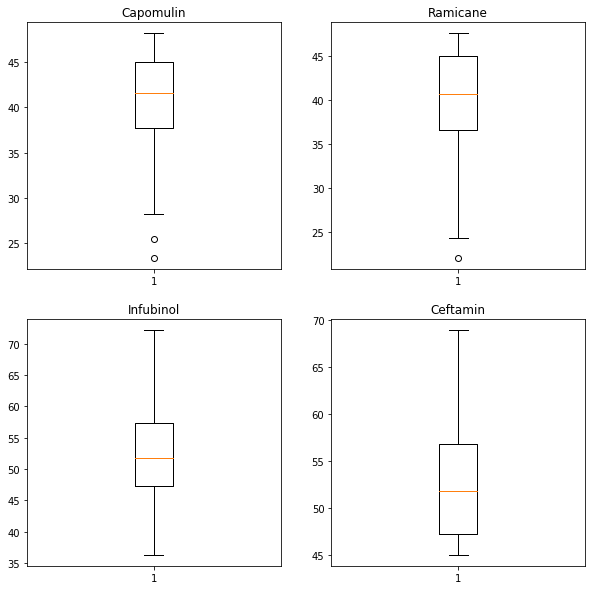

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0, 0].boxplot(capomulin_vol)
ax[0, 0].set_title('Capomulin')
ax[0, 1].boxplot(ramicane_vol)
ax[0, 1].set_title('Ramicane')
ax[1, 0].boxplot(infubinol_vol)
ax[1, 0].set_title('Infubinol')
ax[1, 1].boxplot(ceftamin_vol)
ax[1, 1].set_title('Ceftamin')
plt.show()

## Line and scatter plots

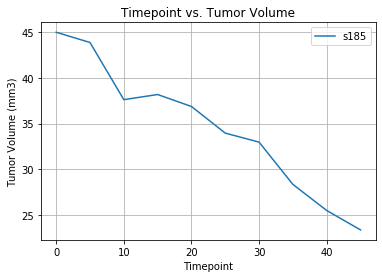

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_plot = df.loc[(df["Drug Regimen"]=="Capomulin") & (df["Mouse ID"]=="s185")]
s185_handle, = plt.plot(mouse_plot["Timepoint"], mouse_plot["Tumor Volume (mm3)"], label="s185")
plt.title('Timepoint vs. Tumor Volume')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(handles=[s185_handle], loc="best")
plt.grid()
plt.show()

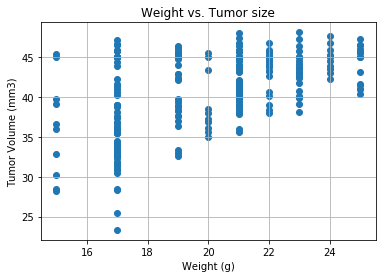

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_plot = df.loc[df["Drug Regimen"]=="Capomulin"]
x_axis = capomulin_plot['Weight (g)']
y_axis = capomulin_plot['Tumor Volume (mm3)']
fig, ax1 = plt.subplots()
ax1.scatter(x_axis, y_axis, marker="o")
ax1.set_title('Weight vs. Tumor size')
ax1.set_xlabel('Weight (g)')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

The correlation between both factors is 0.53


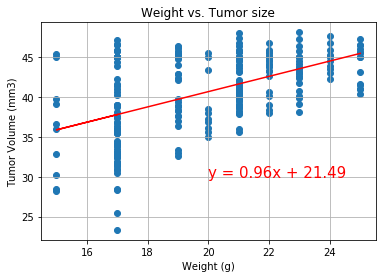

In [23]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.title('Weight vs. Tumor size')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.grid()
plt.show()